In [2]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd


#获取网页信息
def getHTMLText(url):
    try:
        r = requests.get(url,timeout = 10)
        r.raise_for_status()
        r.encoding = r.apparent_encoding #print出来为utf-8编码
        return r.text #返回文本信息
    except:
        print('爬取网页异常！')
        
        
#解析网页信息，筛选房价，地区，小区等信息，存入列表
def HTML2List(info_list,html):
    try:
        name_list = []
        area_list = []
        price_list = []
        soup = BeautifulSoup(html,'html.parser')
        for name in soup.findAll('div',attrs = {'class':'resblock-name'}):
            n = name.find_all('a')[0].string
            name_list.append(n)
        for area in soup.findAll('div',attrs = {'class':'resblock-location'}):
            a = area.find('span').string
            area_list.append(a)
        for price in soup.findAll('div',attrs = {'class':'main-price'}):
            p = price.find('span').string
            price_list.append(p)
        for i in range(len(name_list)):
            info_list.append([name_list[i],area_list[i],price_list[i]])
        return info_list
    except:
        print('error')
        
        
#将列表信息存入CSV文件中
def List2CSV(list):
    file_name = open('E:/Desktop/PY/task-last/fangjia.csv','wt',newline='',encoding='utf-8')
#     file_name = 'E:\Desktop\PY\task-last\\fangjia.csv'
    headers = ['小区','地区','价格']
    data = pd.DataFrame(columns = headers,data = list) #创建列名为headers列表，内容为list列表的二维DataFrame结构数据data
    data.to_csv(file_name)
    
    
def main():
    start_url = 'https://tj.fang.lianjia.com/loupan/pg'
    #爬取 页数
    page = 53 
    info_list = []
    for p in range(page):
        url = start_url + str(p+1)
        html = getHTMLText(url)
        list = HTML2List(info_list,html)
    List2CSV(list)
    
    
if __name__ == '__main__':
    main()

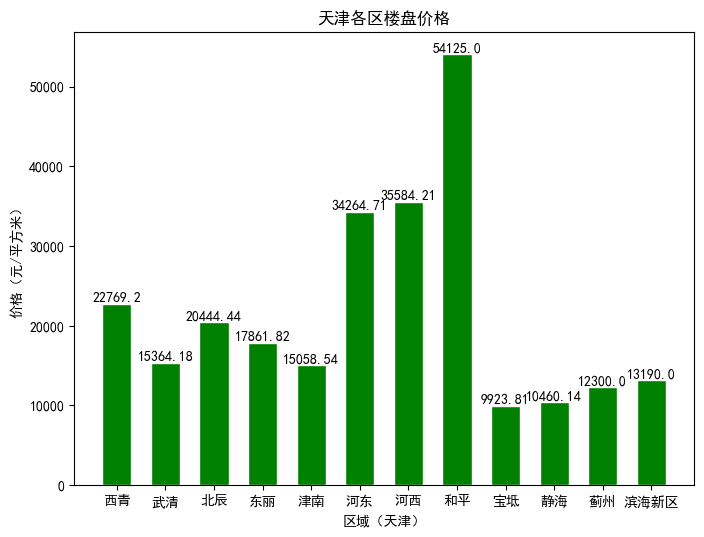

In [7]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(8,6), dpi=100)


#添加文字标签
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2,height,height,ha='center',va='bottom')
        rect.set_edgecolor('white')
        
        
def main():
    file_name = 'E:/Desktop/PY/task-last/fangjia.csv'
    data = pd.read_csv(file_name,encoding='utf-8')
    price_list = []
    area_list = ['西青','武清','北辰','东丽','津南','河东','河西','和平','宝坻','静海','蓟州','滨海新区']
    data.dropna() #去除空值
    data1 = data[~data[u'价格'].isin(['价格待定'])]
    #爬取的价格中有些为价格待定，所以需要去除这些信息，判断价格待定是否存在价格这一列中，再取反
    #data1[u'价格']为取出一列，类型为Series，不能与数字进行比较，所以通过pd.to_numeric()转化为数字，取价格大于2000的信息
    data1 = data1[(pd.to_numeric(data1[u'价格']) > 2000)] 
    
    #取出每个区域信息，采用round函数保留两位小数
    d1 = data1[data1[u'地区'] == '西青']
    p1 = round(pd.to_numeric(d1[u'价格']).sum() / len(d1), 2) #计算价格均值
    price_list.append(p1) #加入列表
    d2 = data1[data1[u'地区'] == '武清']
    p2 = round(pd.to_numeric(d2[u'价格']).sum() / len(d2), 2)
    price_list.append(p2)
    d3 = data1[data1[u'地区'] == '北辰']
    p3 = round(pd.to_numeric(d3[u'价格']).sum() / len(d3), 2)
    price_list.append(p3)
    d4 = data1[data1[u'地区'] == '东丽']
    p4 = round(pd.to_numeric(d4[u'价格']).sum() / len(d4), 2)
    price_list.append(p4)
    d5 = data1[data1[u'地区'] == '津南']
    p5 = round(pd.to_numeric(d5[u'价格']).sum() / len(d5), 2)
    price_list.append(p5)
    d6 = data1[data1[u'地区'] == '河东']
    p6 = round(pd.to_numeric(d6[u'价格']).sum() / len(d6), 2)
    price_list.append(p6)
    d7 = data1[data1[u'地区'] == '河西']
    p7 = round(pd.to_numeric(d7[u'价格']).sum() / len(d7), 2)
    price_list.append(p7)
    d8 = data1[data1[u'地区'] == '和平']
    p8 = round(pd.to_numeric(d8[u'价格']).sum() / len(d8), 2)
    price_list.append(p8)
    d9 = data1[data1[u'地区'] == '宝坻']
    p9 = round(pd.to_numeric(d9[u'价格']).sum() / len(d9), 2)
    price_list.append(p9)
    d10 = data1[data1[u'地区'] == '静海']
    p10 = round(pd.to_numeric(d10[u'价格']).sum() / len(d10), 2)
    price_list.append(p10)
    d11 = data1[data1[u'地区'] == '蓟州']
    p11 = round(pd.to_numeric(d11[u'价格']).sum() / len(d11), 2)
    price_list.append(p11)
    d12 = data1[data1[u'地区'] == '滨海新区']
    p12 = round(pd.to_numeric(d12[u'价格']).sum() / len(d12), 2)
    price_list.append(p12)
    
    bar_width = 0.6
    index = range(len(area_list))
    rects = plt.bar(index,price_list,tick_label=area_list,color='g',width=bar_width,align='center')
    plt.xlabel(u'区域（天津）')
    plt.ylabel(u'价格（元/平方米）')
    plt.title(u'天津各区楼盘价格')
    add_labels(rects)
    plt.savefig('E:/Desktop/PY/task-last/fangjia.png')
    plt.show()
    
    
if __name__ == '__main__':
    main()
    